In [1]:
#necessary librairies :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


the data used can be downloaded at : 
https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction/data    

In [3]:
data=pd.read_csv("C:/Users/Lenovo/Downloads/archive/Real estate.csv")

In [4]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
data["X1 transaction date"]=data["X1 transaction date"].astype(int)

In [7]:
data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [8]:
new_names = ["Nb","transaction_date","house_age","dist_to_MRT","conv_store","lat","long","house_price"]
data= data.set_axis(new_names, axis='columns')
data.head()

,Nb,transaction_date,house_age,dist_to_MRT,conv_store,lat,long,house_price
0,1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
#Checking for duplicates to drop :
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

Nb                  0
transaction_date    0
house_age           0
dist_to_MRT         0
conv_store          0
lat                 0
long                0
house_price         0
dtype: int64

In [11]:
data.set_index("Nb")

,transaction_date,house_age,dist_to_MRT,conv_store,lat,long,house_price
Nb,,,,,,,
1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013,18.8,390.96960,7,24.97923,121.53986,40.6


In [12]:
#Summary statistics :
data.describe()

,Nb,transaction_date,house_age,dist_to_MRT,conv_store,lat,long,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2012.695652,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.460687,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.000000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.000000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.000000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [13]:
data.nunique()

Nb                  414
transaction_date      2
house_age           236
dist_to_MRT         259
conv_store           11
lat                 234
long                232
house_price         270
dtype: int64

In [14]:
data.drop(columns=['Nb'],inplace=True)

In [15]:
import seaborn as sns

we'll rely on correlations to choose variables for our regression :

<Axes: >

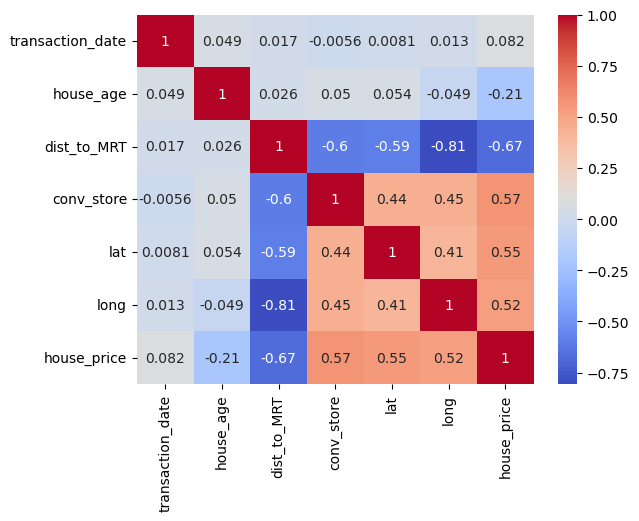

In [16]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

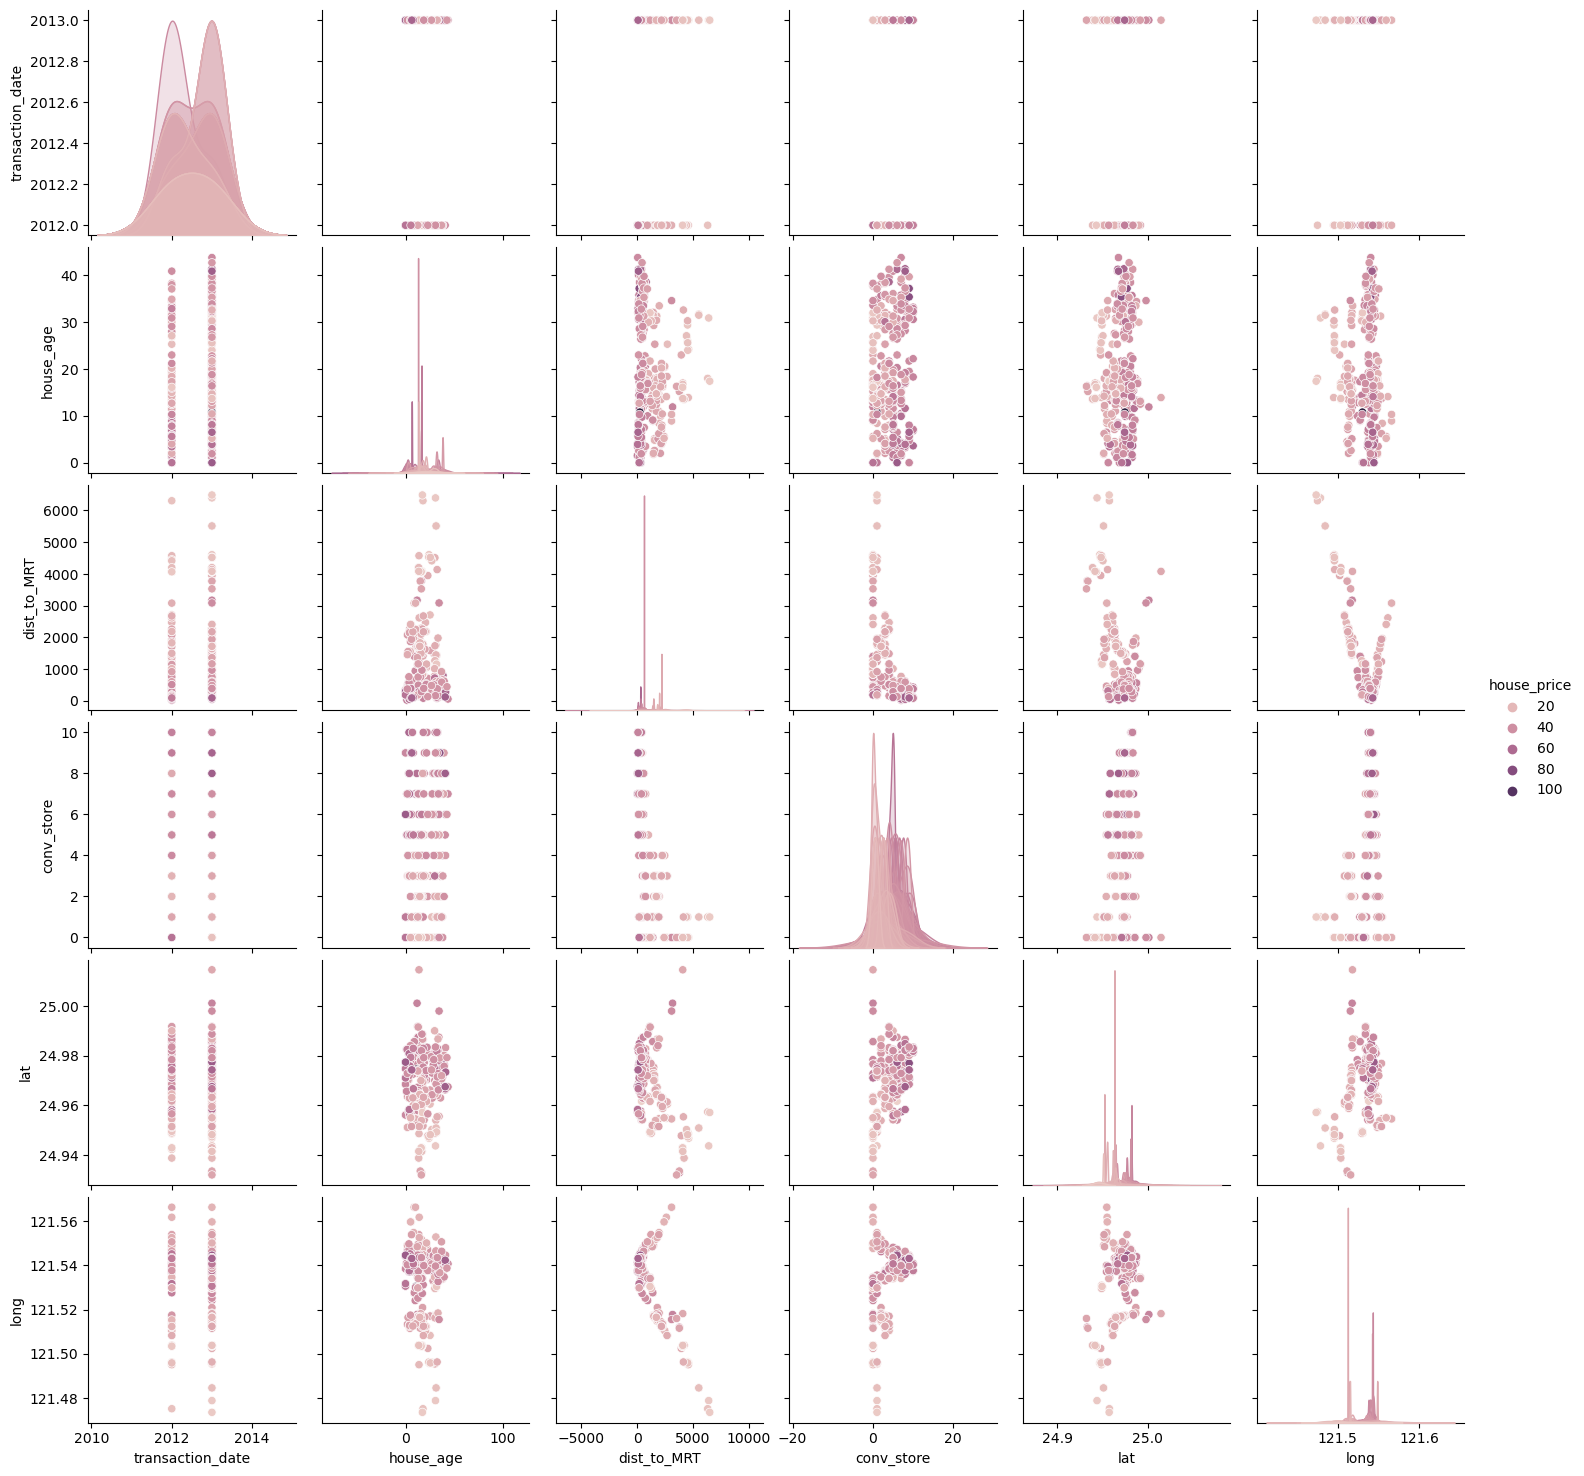

In [17]:
#kernel density estimates on the diagonal provides a smooth curve to represent the distribution of each individual variable
sns.pairplot(data, diag_kind='kde',hue='house_price')

In [18]:
X= data.drop('house_price',axis=1)
y= data['house_price']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=22)
X_train.shape,y_train.shape

((277, 6), (277,))

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [23]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5360822568500488

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

83.79193492474062

In [27]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.20026272176206067

In [28]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

6.921319895306406

In [29]:
from sklearn.metrics import max_error
max_error(y_test,y_pred)

36.279423241624215

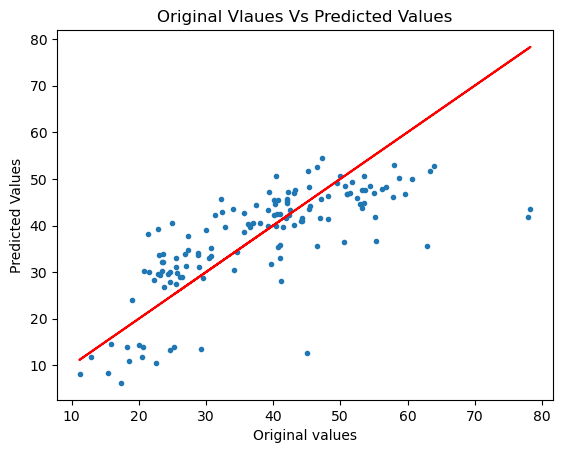

In [30]:
#Graphic Evaluation of Model prediction :

plt.scatter(y_test,y_pred,marker=".")
plt.title("Original Vlaues Vs Predicted Values")
plt.xlabel('Original values')
plt.ylabel('Predicted Values')
plt.plot(y_test,y_test, color='red', linestyle='-')
plt.show()

Residuals Distribution :

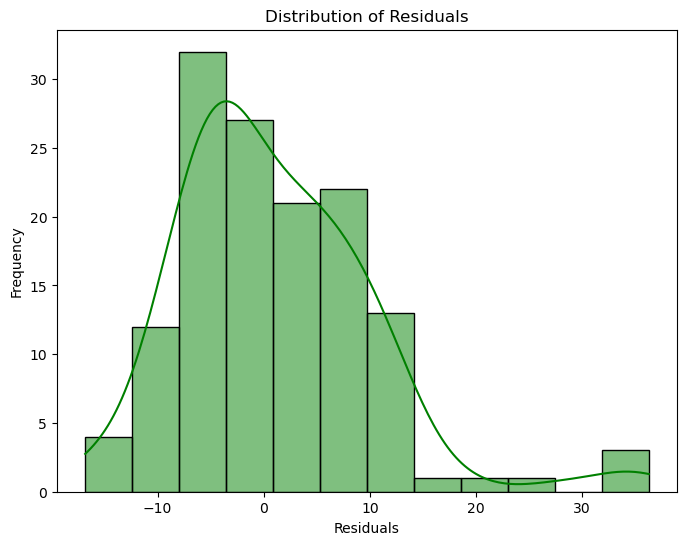

In [31]:
residuals = y_test - y_pred


plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=12, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

A positive skewness !

 Residual vs. Fitted Values Plot

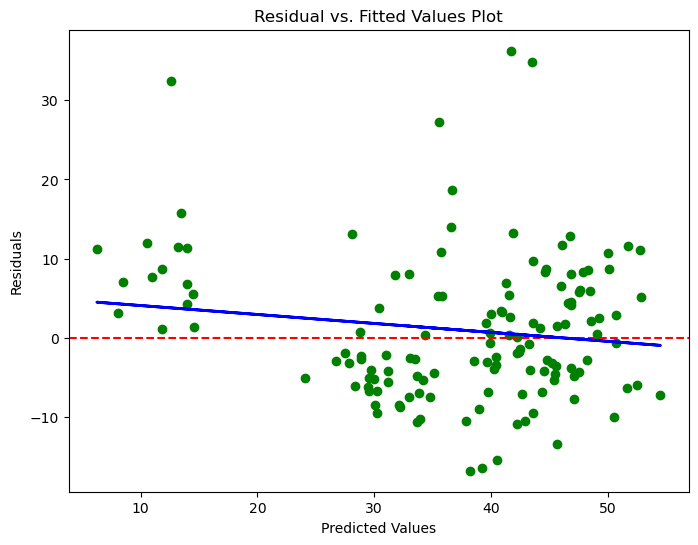

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred,residuals, color='green')
plt.axhline(y=0,color='Red',linestyle='--')
slope, intercept = np.polyfit(y_pred, residuals, deg=1)
reg_line_y = slope * y_pred + intercept
plt.plot(y_pred, reg_line_y, color='blue', linewidth=2)
plt.title('Residual vs. Fitted Values Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


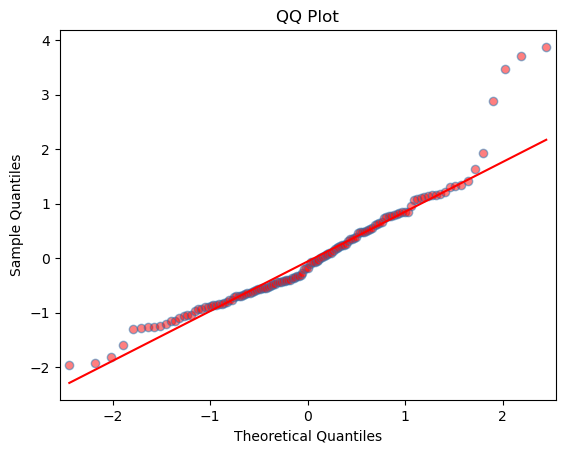

In [33]:
import statsmodels.api as sm
sm.qqplot(residuals, line='q', fit=True, color='blue', markerfacecolor='red', alpha=0.5)
plt.title('QQ Plot')
plt.show()